In [7]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

df.head()

Saving Heart.csv to Heart.csv


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
print("Shape of the data:", df.shape)

Shape of the data: (303, 15)


In [3]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

,YEAR,MONTH,TEMP
0,1901,JAN,22.40
1,1902,JAN,24.93
2,1903,JAN,23.44
3,1904,JAN,22.50
4,1905,JAN,22.00


In [9]:
print("Data types of columns:\n", df.dtypes)

Data types of columns:
 Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [13]:
zero_counts = (df == 0).sum()
print("Zero counts in each column:\n", zero_counts)

Zero counts in each column:
 Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64


In [10]:
mean_age = df['Age'].mean()
print("Mean age of patients:", mean_age)

Mean age of patients: 54.43894389438944


In [11]:
from sklearn.model_selection import train_test_split

selected_cols = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']
selected_df = df[selected_cols]

train_df, test_df = train_test_split(selected_df, test_size=0.25, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (227, 5)
Testing set shape: (76, 5)


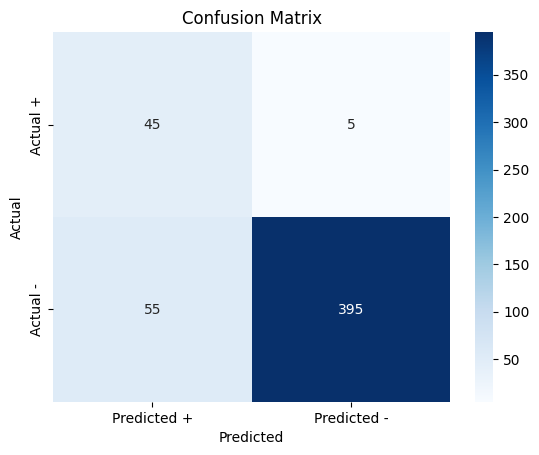

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

TP, FP, FN, TN = 45, 55, 5, 395
cm = np.array([[TP, FN], [FP, TN]])

df_cm = pd.DataFrame(cm, index=['Actual +', 'Actual -'], columns=['Predicted +', 'Predicted -'])

sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()